ALGORITMA PEMBENTUKAN GARIS
Perbandingan m < 1 (Landai) dan m > 1 (Curam)
Tugas Latihan Praktikum Grafika Komputer

CONTOH 1: GARIS LANDAI (m < 1)
Titik awal: (10, 10)
Titik akhir: (50, 25)

Δx = 40, Δy = 15
Kemiringan m = Δy / Δx = 15 / 40 = 0.3750
Kasus: m < 1 (garis landai)

→ Menggunakan algoritma m < 1 (iterasi x)
   N = |x2 - x1| + 1 = 41
   y = y1 = 10

   Ulangi sebanyak N kali:
   (a) y = m(x - x1) + y1 = 0.3750(x - 10) + 10
   (b) ya = Round(y)
   (c) gambar titik (x, ya)
   (d) x = x + 1

Hasil: 41 piksel terbentuk

--- DETAIL PERHITUNGAN (5 iterasi pertama) ---
Iterasi 0: x=10, y=0.3750×(10-10)+10 = 10.0000 → Round = 10 → Piksel(10, 10)
Iterasi 1: x=11, y=0.3750×(11-10)+10 = 10.3750 → Round = 10 → Piksel(11, 10)
Iterasi 2: x=12, y=0.3750×(12-10)+10 = 10.7500 → Round = 11 → Piksel(12, 11)
Iterasi 3: x=13, y=0.3750×(13-10)+10 = 11.1250 → Round = 11 → Piksel(13, 11)
Iterasi 4: x=14, y=0.3750×(14-10)+10 = 11.5000 → Round = 12 → Piksel(14, 12)
... (36 iterasi lainnya)

10 Piksel

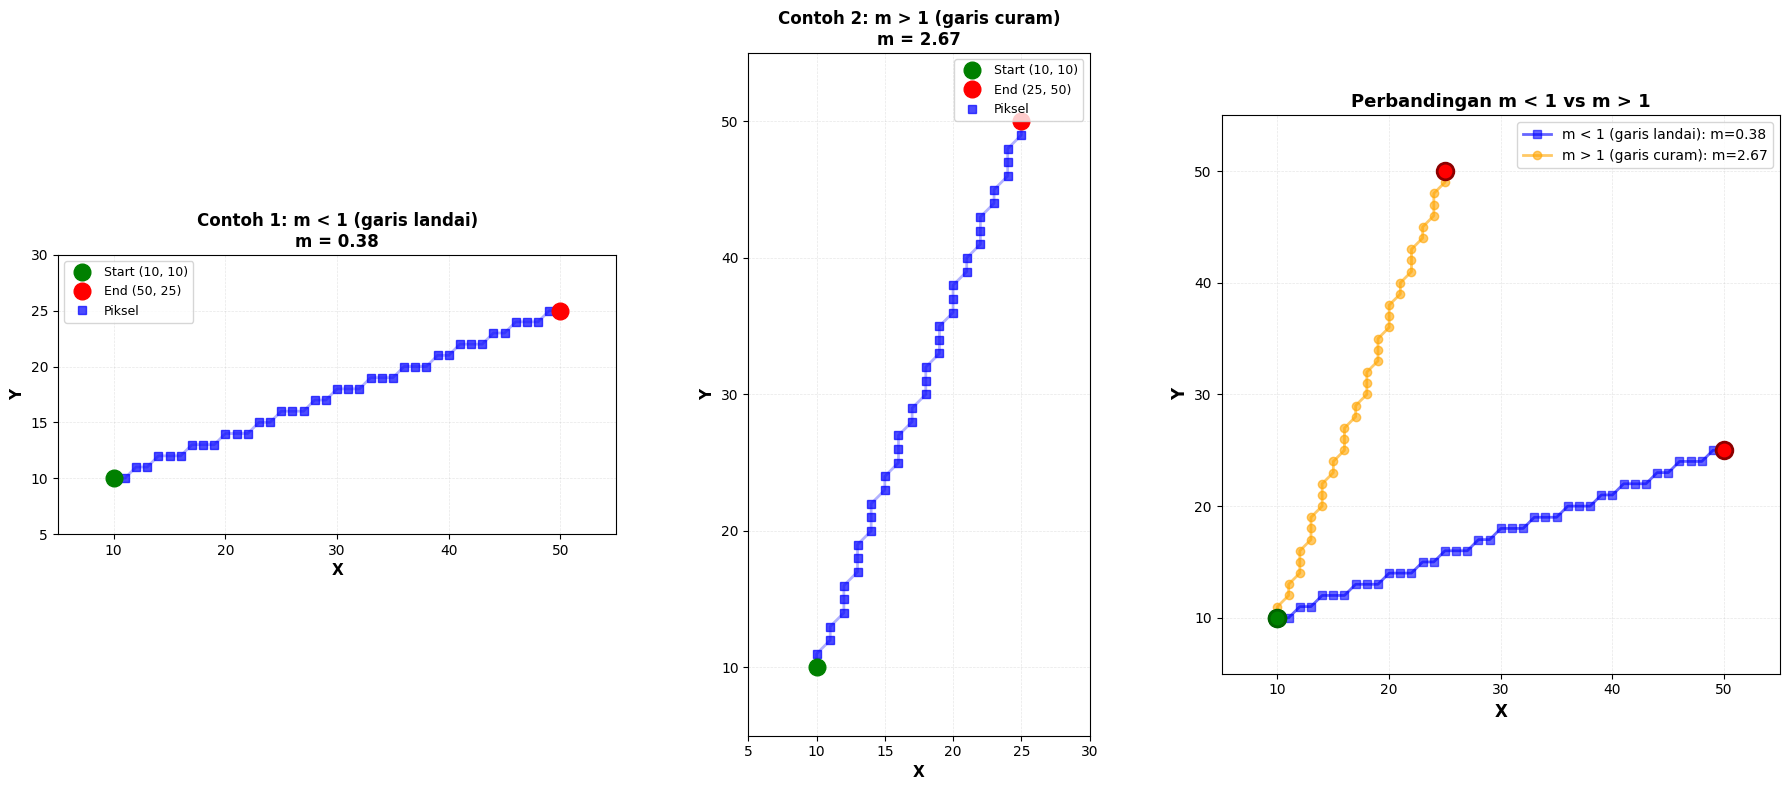

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def line_algorithm_complete(x1, y1, x2, y2):
    """
    Algoritma Pembentukan Garis dengan menangani m > 1 dan m < 1
    
    Parameters:
    x1, y1: koordinat titik awal
    x2, y2: koordinat titik akhir
    
    Returns:
    list: daftar koordinat piksel yang membentuk garis
    """
    pixels = []
    
    # Hitung selisih koordinat
    dx = x2 - x1
    dy = y2 - y1
    
    print(f"Δx = {dx}, Δy = {dy}")
    
    # Jika titik awal sama dengan titik akhir
    if dx == 0 and dy == 0:
        pixels.append((round(x1), round(y1)))
        return pixels, "Titik tunggal", None
    
    # Hitung kemiringan (slope) m
    if dx == 0:
        m = float('inf')
        case = "Garis vertikal (dx = 0)"
        print(f"Kemiringan m = ∞ (garis vertikal)")
    else:
        m = dy / dx
        print(f"Kemiringan m = Δy / Δx = {dy} / {dx} = {m:.4f}")
        
        if abs(m) > 1:
            case = "m > 1 (garis curam)"
        elif abs(m) == 1:
            case = "m = 1 (garis diagonal 45°)"
        else:
            case = "m < 1 (garis landai)"
    
    print(f"Kasus: {case}")
    
    # KASUS 1: m < 1 (garis landai) - iterasi berdasarkan x
    if abs(m) <= 1 and dx != 0:
        print("\n→ Menggunakan algoritma m < 1 (iterasi x)")
        
        N = abs(int(x2 - x1)) + 1
        print(f"   N = |x2 - x1| + 1 = {N}")
        print(f"   y = y1 = {y1}")
        print(f"\n   Ulangi sebanyak N kali:")
        print(f"   (a) y = m(x - x1) + y1 = {m:.4f}(x - {x1}) + {y1}")
        print(f"   (b) ya = Round(y)")
        print(f"   (c) gambar titik (x, ya)")
        print(f"   (d) x = x + 1")
        
        if x1 <= x2:
            x_start, x_end, x_step = x1, x2, 1
        else:
            x_start, x_end, x_step = x1, x2, -1
        
        x = x_start
        for i in range(N):
            y = m * (x - x1) + y1
            ya = round(y)
            pixels.append((round(x), ya))
            x += x_step
    
    # KASUS 2: m > 1 (garis curam) - iterasi berdasarkan y
    else:
        print("\n→ Menggunakan algoritma m > 1 (iterasi y)")
        
        if dy != 0:
            m_inverse = dx / dy
            print(f"   m = (x2 - x1) / (y2 - y1) = {dx} / {dy} = {m_inverse:.4f}")
        else:
            m_inverse = 0
            
        N = abs(int(y2 - y1)) + 1
        print(f"   N = |y2 - y1| + 1 = {N}")
        print(f"   x = x1 = {x1}")
        print(f"\n   Ulangi sebanyak N kali:")
        print(f"   (a) x = m(y - y1) + x1 = {m_inverse:.4f}(y - {y1}) + {x1}")
        print(f"   (b) xa = Round(x)")
        print(f"   (c) gambar titik (xa, y)")
        print(f"   (d) y = y + 1")
        
        if y1 <= y2:
            y_start, y_end, y_step = y1, y2, 1
        else:
            y_start, y_end, y_step = y1, y2, -1
        
        y = y_start
        for i in range(N):
            if dy != 0:
                x = m_inverse * (y - y1) + x1
            else:
                x = x1
            xa = round(x)
            pixels.append((xa, round(y)))
            y += y_step
    
    return pixels, case, m

def plot_combined_lines(line1_data, line2_data):
    """
    Menampilkan dua garis sekaligus (m < 1 dan m > 1)
    """
    fig = plt.figure(figsize=(18, 8))
    
    # Unpack data
    (x1_1, y1_1, x2_1, y2_1, pixels1, case1, m1) = line1_data
    (x1_2, y1_2, x2_2, y2_2, pixels2, case2, m2) = line2_data
    
    # Plot 1: Garis pertama (m < 1)
    ax1 = plt.subplot(1, 3, 1)
    plot_single_line(ax1, x1_1, y1_1, x2_1, y2_1, pixels1, case1, m1, 'Contoh 1')
    
    # Plot 2: Garis kedua (m > 1)
    ax2 = plt.subplot(1, 3, 2)
    plot_single_line(ax2, x1_2, y1_2, x2_2, y2_2, pixels2, case2, m2, 'Contoh 2')
    
    # Plot 3: Kedua garis dalam satu canvas
    ax3 = plt.subplot(1, 3, 3)
    ax3.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
    ax3.set_aspect('equal')
    
    # Gabungkan semua koordinat untuk menentukan batas
    all_x = [x1_1, x2_1, x1_2, x2_2] + [p[0] for p in pixels1] + [p[0] for p in pixels2]
    all_y = [y1_1, y2_1, y1_2, y2_2] + [p[1] for p in pixels1] + [p[1] for p in pixels2]
    
    margin = 5
    ax3.set_xlim(min(all_x) - margin, max(all_x) + margin)
    ax3.set_ylim(min(all_y) - margin, max(all_y) + margin)
    
    # Plot garis 1 (biru)
    x_coords1 = [p[0] for p in pixels1]
    y_coords1 = [p[1] for p in pixels1]
    ax3.plot(x_coords1, y_coords1, 'bs-', markersize=6, alpha=0.6, linewidth=2, 
             label=f'{case1}: m={m1:.2f}' if m1 != float('inf') else case1)
    ax3.plot(x1_1, y1_1, 'go', markersize=12, markeredgecolor='darkgreen', markeredgewidth=2)
    ax3.plot(x2_1, y2_1, 'ro', markersize=12, markeredgecolor='darkred', markeredgewidth=2)
    
    # Plot garis 2 (orange)
    x_coords2 = [p[0] for p in pixels2]
    y_coords2 = [p[1] for p in pixels2]
    ax3.plot(x_coords2, y_coords2, 'o-', color='orange', markersize=6, alpha=0.6, linewidth=2,
             label=f'{case2}: m={m2:.2f}' if m2 != float('inf') else case2)
    ax3.plot(x1_2, y1_2, 'go', markersize=12, markeredgecolor='darkgreen', markeredgewidth=2)
    ax3.plot(x2_2, y2_2, 'ro', markersize=12, markeredgecolor='darkred', markeredgewidth=2)
    
    ax3.set_xlabel('X', fontsize=12, fontweight='bold')
    ax3.set_ylabel('Y', fontsize=12, fontweight='bold')
    ax3.set_title('Perbandingan m < 1 vs m > 1', fontsize=13, fontweight='bold')
    ax3.legend(loc='best', fontsize=10)
    
    plt.tight_layout()
    plt.show()

def plot_single_line(ax, x1, y1, x2, y2, pixels, case, m, title):
    """
    Plot satu garis pada axes tertentu
    """
    ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
    ax.set_aspect('equal')
    
    # Atur batas plot
    margin = 5
    x_min = min(x1, x2, min([p[0] for p in pixels])) - margin
    x_max = max(x1, x2, max([p[0] for p in pixels])) + margin
    y_min = min(y1, y2, min([p[1] for p in pixels])) - margin
    y_max = max(y1, y2, max([p[1] for p in pixels])) + margin
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    
    # Plot titik awal (hijau) dan akhir (merah)
    ax.plot(x1, y1, 'go', markersize=12, label=f'Start ({x1}, {y1})', zorder=5)
    ax.plot(x2, y2, 'ro', markersize=12, label=f'End ({x2}, {y2})', zorder=5)
    
    # Plot piksel garis
    x_coords = [p[0] for p in pixels]
    y_coords = [p[1] for p in pixels]
    ax.plot(x_coords, y_coords, 'bs', markersize=6, label='Piksel', alpha=0.7)
    ax.plot(x_coords, y_coords, 'b-', alpha=0.3, linewidth=2)
    
    ax.set_xlabel('X', fontsize=11, fontweight='bold')
    ax.set_ylabel('Y', fontsize=11, fontweight='bold')
    
    m_text = f'm = {m:.2f}' if m != float('inf') else 'm = ∞'
    ax.set_title(f'{title}: {case}\n{m_text}', fontsize=12, fontweight='bold')
    ax.legend(loc='best', fontsize=9)

def main():
    """
    Program utama - Menampilkan m < 1 dan m > 1 sekaligus
    """
    print("=" * 70)
    print("ALGORITMA PEMBENTUKAN GARIS")
    print("Perbandingan m < 1 (Landai) dan m > 1 (Curam)")
    print("Tugas Latihan Praktikum Grafika Komputer")
    print("=" * 70)
    
    # CONTOH 1: Garis Landai (m < 1)
    print("\n" + "=" * 70)
    print("CONTOH 1: GARIS LANDAI (m < 1)")
    print("=" * 70)
    x1_1, y1_1 = 10, 10
    x2_1, y2_1 = 50, 25
    print(f"Titik awal: ({x1_1}, {y1_1})")
    print(f"Titik akhir: ({x2_1}, {y2_1})\n")
    
    pixels1, case1, m1 = line_algorithm_complete(x1_1, y1_1, x2_1, y2_1)
    
    print(f"\nHasil: {len(pixels1)} piksel terbentuk")
    
    # Tampilkan perhitungan detail untuk beberapa iterasi pertama
    print("\n--- DETAIL PERHITUNGAN (5 iterasi pertama) ---")
    dx1 = x2_1 - x1_1
    dy1 = y2_1 - y1_1
    m_val1 = dy1 / dx1 if dx1 != 0 else 0
    
    for i in range(min(5, len(pixels1))):
        if abs(m_val1) <= 1:  # m < 1
            x_curr = x1_1 + i
            y_calc = m_val1 * (x_curr - x1_1) + y1_1
            y_round = round(y_calc)
            print(f"Iterasi {i}: x={int(x_curr)}, y={m_val1:.4f}×({x_curr:.0f}-{x1_1})+{y1_1} = {y_calc:.4f} → Round = {y_round} → Piksel({int(x_curr)}, {y_round})")
        else:  # m > 1
            y_curr = y1_1 + i
            x_calc = (dx1/dy1) * (y_curr - y1_1) + x1_1
            x_round = round(x_calc)
            print(f"Iterasi {i}: y={int(y_curr)}, x={(dx1/dy1):.4f}×({y_curr:.0f}-{y1_1})+{x1_1} = {x_calc:.4f} → Round = {x_round} → Piksel({x_round}, {int(y_curr)})")
    
    print(f"... ({len(pixels1) - 5} iterasi lainnya)")
    print("\n10 Piksel pertama:", pixels1[:10])
    print("10 Piksel terakhir:", pixels1[-10:])
    
    # CONTOH 2: Garis Curam (m > 1)
    print("\n" + "=" * 70)
    print("CONTOH 2: GARIS CURAM (m > 1)")
    print("=" * 70)
    x1_2, y1_2 = 10, 10
    x2_2, y2_2 = 25, 50
    print(f"Titik awal: ({x1_2}, {y1_2})")
    print(f"Titik akhir: ({x2_2}, {y2_2})\n")
    
    pixels2, case2, m2 = line_algorithm_complete(x1_2, y1_2, x2_2, y2_2)
    
    print(f"\nHasil: {len(pixels2)} piksel terbentuk")
    
    # Tampilkan perhitungan detail untuk beberapa iterasi pertama
    print("\n--- DETAIL PERHITUNGAN (5 iterasi pertama) ---")
    dx2 = x2_2 - x1_2
    dy2 = y2_2 - y1_2
    m_val2 = dy2 / dx2 if dx2 != 0 else float('inf')
    
    for i in range(min(5, len(pixels2))):
        if abs(m_val2) <= 1:  # m < 1
            x_curr = x1_2 + i
            y_calc = m_val2 * (x_curr - x1_2) + y1_2
            y_round = round(y_calc)
            print(f"Iterasi {i}: x={int(x_curr)}, y={m_val2:.4f}×({x_curr:.0f}-{x1_2})+{y1_2} = {y_calc:.4f} → Round = {y_round} → Piksel({int(x_curr)}, {y_round})")
        else:  # m > 1
            y_curr = y1_2 + i
            x_calc = (dx2/dy2) * (y_curr - y1_2) + x1_2
            x_round = round(x_calc)
            print(f"Iterasi {i}: y={int(y_curr)}, x={(dx2/dy2):.4f}×({y_curr:.0f}-{y1_2})+{x1_2} = {x_calc:.4f} → Round = {x_round} → Piksel({x_round}, {int(y_curr)})")
    
    print(f"... ({len(pixels2) - 5} iterasi lainnya)")
    print("\n10 Piksel pertama:", pixels2[:10])
    print("10 Piksel terakhir:", pixels2[-10:])
    
    # RINGKASAN PERBANDINGAN
    print("\n" + "=" * 70)
    print("RINGKASAN PERBANDINGAN")
    print("=" * 70)
    print(f"\n{'Parameter':<25} | {'Garis 1 (m<1)':<20} | {'Garis 2 (m>1)':<20}")
    print("-" * 70)
    print(f"{'Titik Awal':<25} | ({x1_1}, {y1_1}){'':<13} | ({x1_2}, {y1_2}){'':<13}")
    print(f"{'Titik Akhir':<25} | ({x2_1}, {y2_1}){'':<13} | ({x2_2}, {y2_2}){'':<13}")
    print(f"{'Kemiringan (m)':<25} | {m1:<20.4f} | {m2:<20.4f}")
    print(f"{'Jenis':<25} | {case1:<20} | {case2:<20}")
    print(f"{'Iterasi berdasarkan':<25} | {'X (horizontal)':<20} | {'Y (vertical)':<20}")
    print(f"{'Jumlah Piksel':<25} | {len(pixels1):<20} | {len(pixels2):<20}")
    
    print("\n" + "=" * 70)
    print("KESIMPULAN:")
    print("=" * 70)
    print("• m < 1: Garis LANDAI → iterasi berdasarkan X (horizontal)")
    print("         Formula: y = m(x - x₁) + y₁, kemudian bulatkan y")
    print("\n• m > 1: Garis CURAM → iterasi berdasarkan Y (vertical)")
    print("         Formula: x = m(y - y₁) + x₁, kemudian bulatkan x")
    print("\n• Kedua algoritma menghasilkan garis yang smooth dan connected")
    print("=" * 70)
    
    # Visualisasi gabungan
    print("\nMembuat visualisasi perbandingan...")
    line1_data = (x1_1, y1_1, x2_1, y2_1, pixels1, case1, m1)
    line2_data = (x1_2, y1_2, x2_2, y2_2, pixels2, case2, m2)
    plot_combined_lines(line1_data, line2_data)

if __name__ == "__main__":
    main()